In [1]:
import matplotlib.pyplot as plt
import tifffile
import cv2
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import numpy as np

In [2]:
pot_img = tifffile.imread('../../datasets/Potsdam/Potsdam_tiff/2_Ortho_RGB/top_potsdam_2_10_RGB.tif')
pot_img = cv2.resize(pot_img, (0, 0), fx = 0.448, fy = 0.448)
vai_img = tifffile.imread('../../datasets/Vaihingen/Vaihingen_tiff/img/top_mosaic_09cm_area11.tif')

In [3]:

pot_segments = slic(pot_img, n_segments = 3000, compactness = 30)
vai_segments = slic(vai_img, n_segments = 3000, compactness = 30)


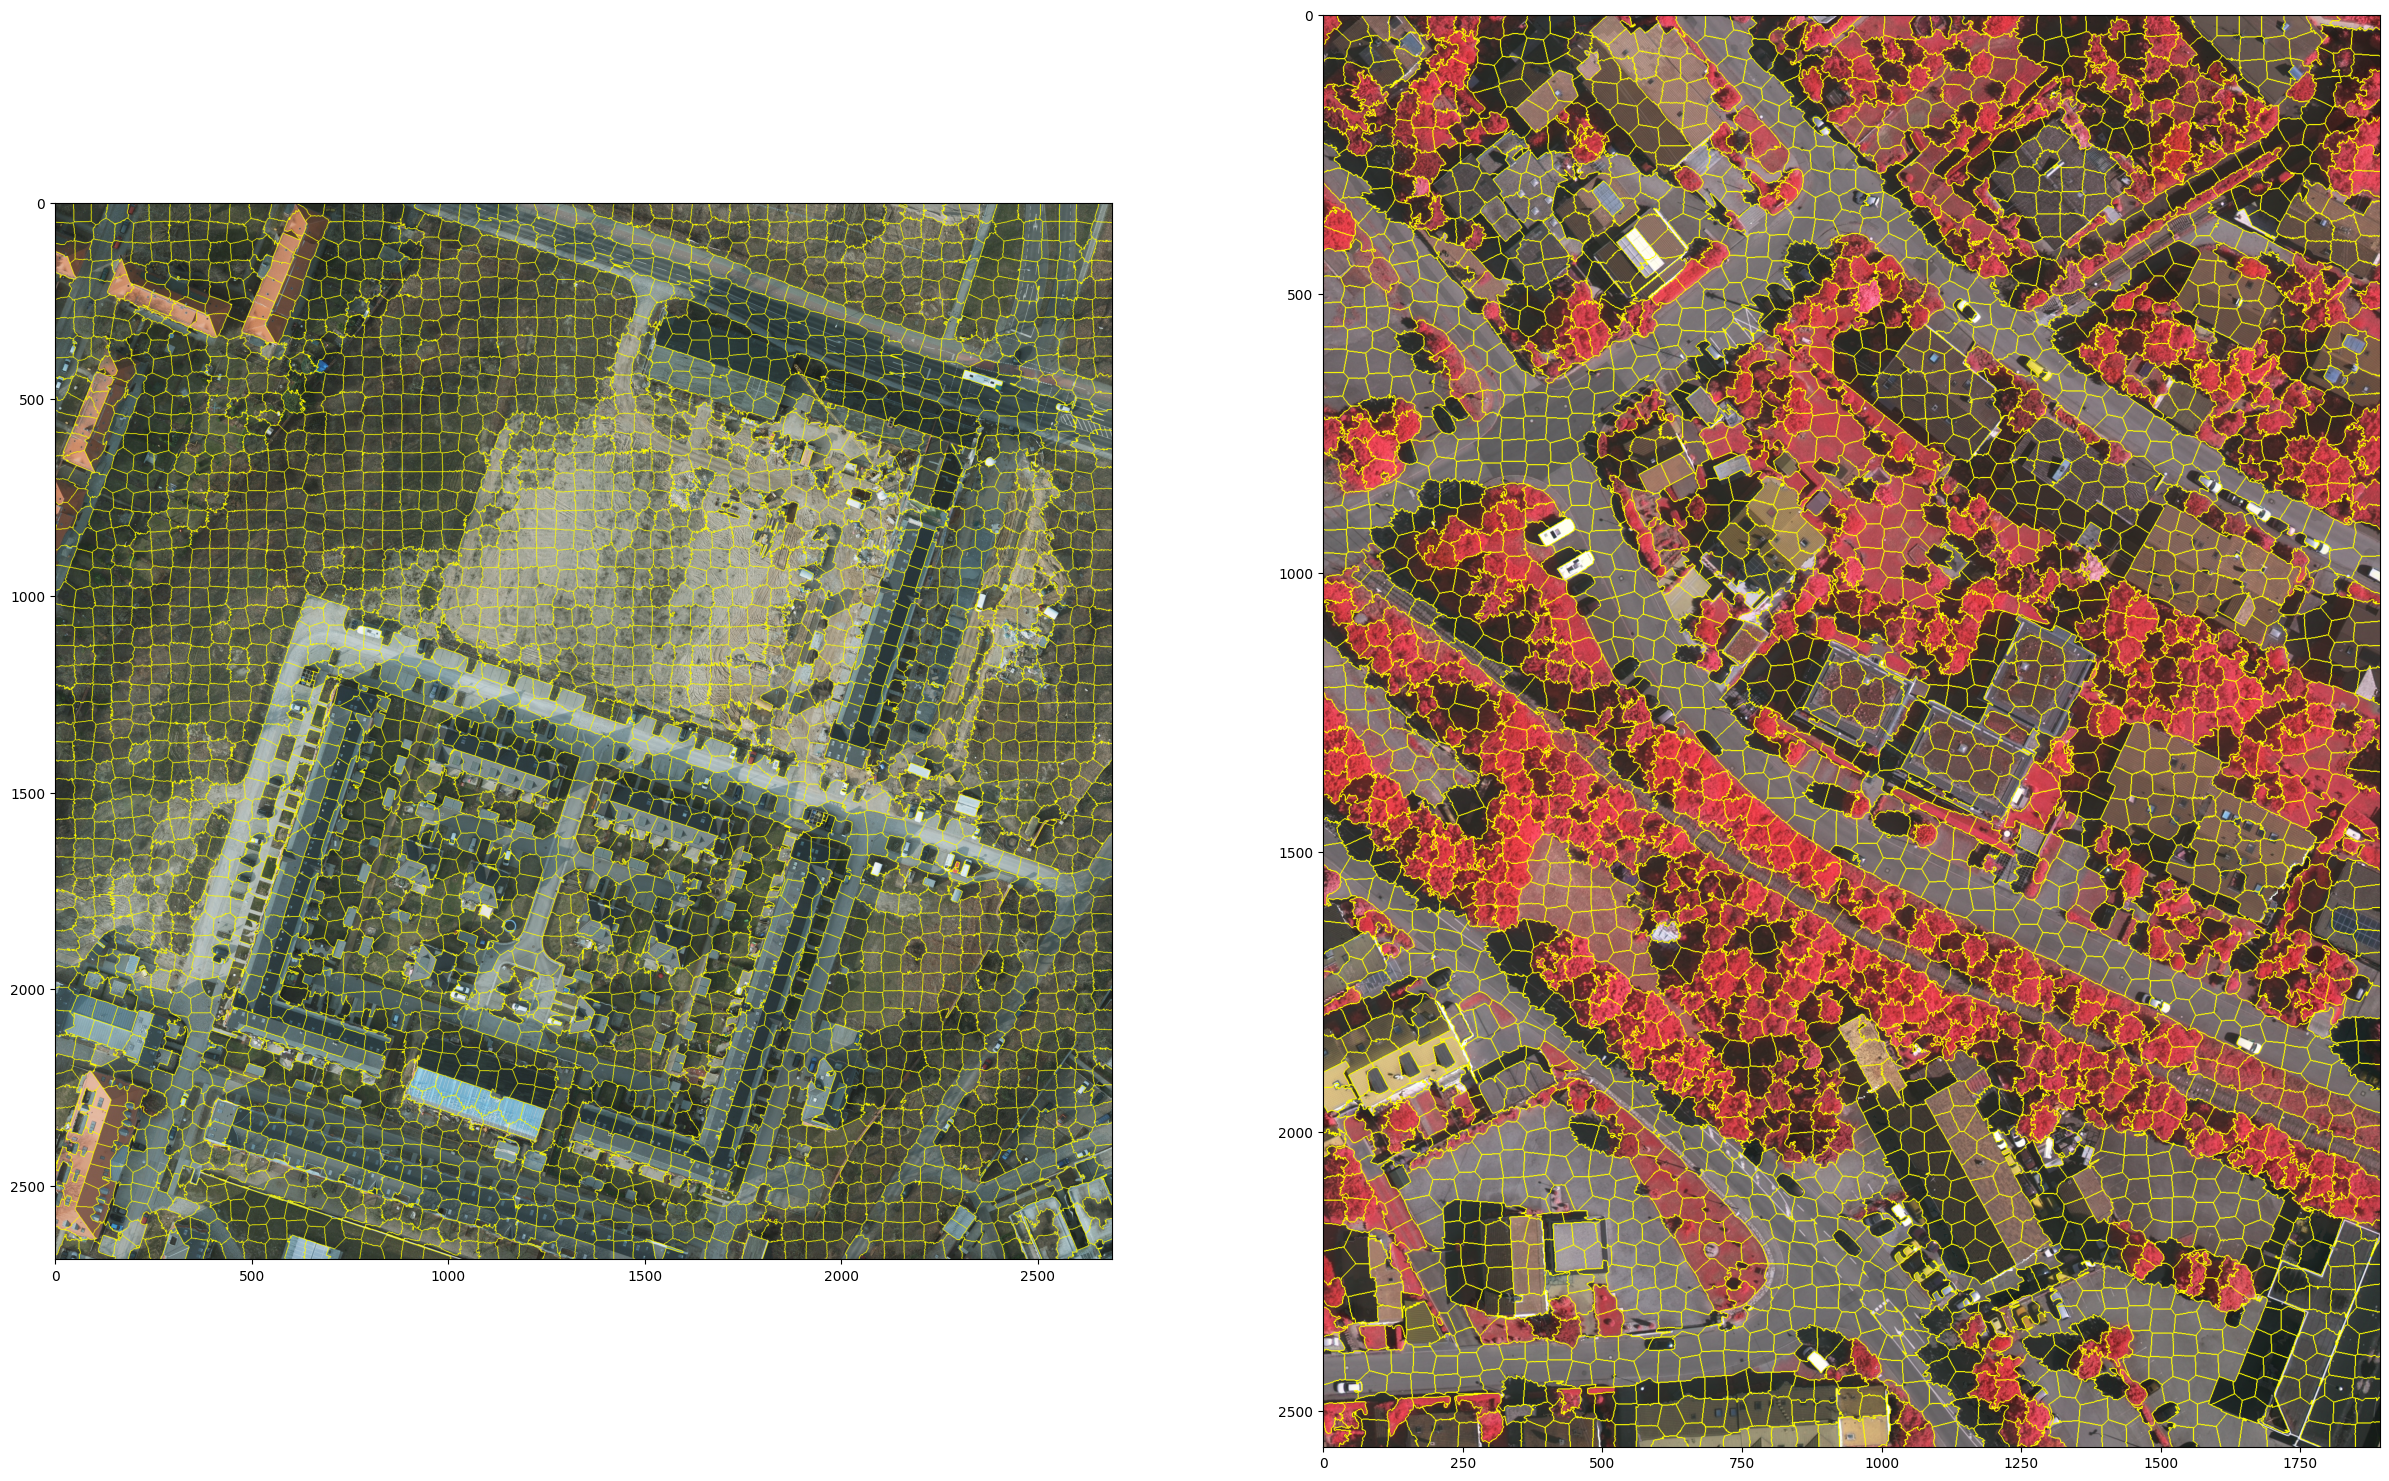

In [4]:

f, axarr = plt.subplots(1, 2, figsize=(30,30))

axarr[0].imshow(mark_boundaries(pot_img, pot_segments, color=(1, 1, 0), mode='thick'))
axarr[1].imshow(mark_boundaries(vai_img, vai_segments, color=(1, 1, 0), mode='thick'))

plt.show()

In [5]:
def generate_mask(image_shape, num_squares, square_size, mask_color=0):
    mask = np.ones(image_shape[:-1], dtype=np.uint8) * 255

    for _ in range(num_squares):
        x = np.random.randint(0, image_shape[1] - square_size)
        y = np.random.randint(0, image_shape[0] - square_size)
        mask[y:y+square_size, x:x+square_size] = mask_color

    return mask

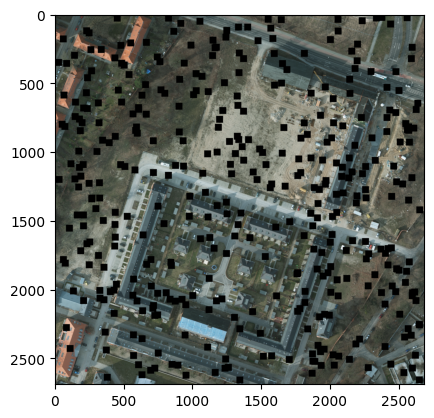

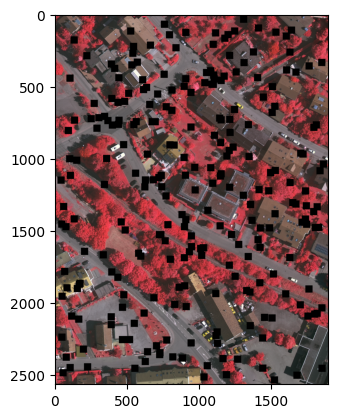

In [8]:
mask = generate_mask(pot_img.shape, 400, 50, 0)
plt.show()
t = pot_img.copy()
t[np.where(mask == 0)] = 0
plt.imshow(t)

mask = generate_mask(vai_img.shape, 250, 50, 0)
plt.show()
t = vai_img.copy()
t[np.where(mask == 0)] = 0
plt.imshow(t)

In [7]:
import torch
import torchvision.transforms as transforms
from PIL import Image
  
# Read image
image = Image.open('../../datasets/Vaihingen/Vaihingen_448/img/1_4.png')
  
# create an transform for crop the image
# 300px height and 600px wide
transform = transforms.RandomCrop(size=(300, 300)) 
resize = transforms.Resize(size=(448, 448))
# use above created transform to crop
# the image
image_crop = resize(transform(image))
  
# display result
image_crop.show()
image.show()